In [14]:
options(jupyter.plot_mimetypes = "image/png")
library(ggplot2)

In [15]:
data = read.csv("../Data/Data_Classifications_v7.csv")

data<-data[c('PID','Info.type','Accuracy.50','Significance','Roi.Search',
             'Pattern.type','Classifier.type','Scanner','Smoothing','Coregistration','Pattern.normalization.type','Num_subs')]

factors<-c('Info.type','Significance','Roi.Search',
             'Pattern.type','Classifier.type','Scanner','Smoothing','Coregistration','Pattern.normalization.type','Num_subs')

for (pid in unique(data$PID)){
    #print('--')
    #print(pid)
    #print(nrow(data1[data1$PID==pid,]))
    #print('--')
    data[data$PID==pid,'n_per_study']=nrow(data[data$PID==pid,])
}

In [16]:
# mscl fixed 
data<-data[!data$Classifier.type=='neural-net',] # no observations but still has a level
data[data$Scanner=='4T','Scanner']='3T' # only one observatoin with 3T

data$PID<-as.factor(data$PID)
data$Info.type<-as.factor(data$Info.type)
data$Smoothing<-as.factor(data$Smoothing)
data$Roi.Search<-as.factor(data$Roi.Search)
data$Classifier.type<-as.factor(data$Classifier.type)
data$Coregistration<-as.factor(data$Coregistration)
data$Pattern.type<-as.factor(data$Pattern.type)

#data[data$Pattern.normalization.type=='Normalized Spatially']

data$Pattern.normalization.type<-as.factor(data$Pattern.normalization.type)

data<-droplevels(data)

data_50<-subset(data,!is.na(Accuracy.50))

data_50_non<-subset(data,!is.na(Accuracy.50)& Significance==0)

data_50_sig<-subset(data,!is.na(Accuracy.50) & Significance==1)
head(data_50_sig)
nrow(data_50_sig)


,PID,Info.type,Accuracy.50,Significance,Roi.Search,Pattern.type,Classifier.type,Scanner,Smoothing,Coregistration,Pattern.normalization.type,Num_subs,n_per_study
4,1,Perceptual,0.528,1,ROI,Multi-Trial Multi-Time Point,svm-lin,3T,unsmooth,Native Space,None,17,12
9,1,Rule,0.535,1,ROI,Multi-Trial Multi-Time Point,svm-lin,3T,unsmooth,Native Space,None,17,12
10,1,Rule,0.541,1,ROI,Multi-Trial Multi-Time Point,svm-lin,3T,unsmooth,Native Space,None,17,12
11,1,Rule,0.543,1,ROI,Multi-Trial Multi-Time Point,svm-lin,3T,unsmooth,Native Space,None,17,12
12,1,Rule,0.593,1,ROI,Multi-Trial Multi-Time Point,svm-lin,3T,unsmooth,Native Space,None,17,12
16,2,Rule,0.64,1,ROI,Single Trial Multi-Time Point,LDA,3T,unsmooth,Native Space,None,6,4


[1] 506

In [18]:
unique(data_50$n_per_study)

[1] 12  4  3  6 49 24 96 15 10 18  1  2 26  8 42  9 11 20 22 16  7

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


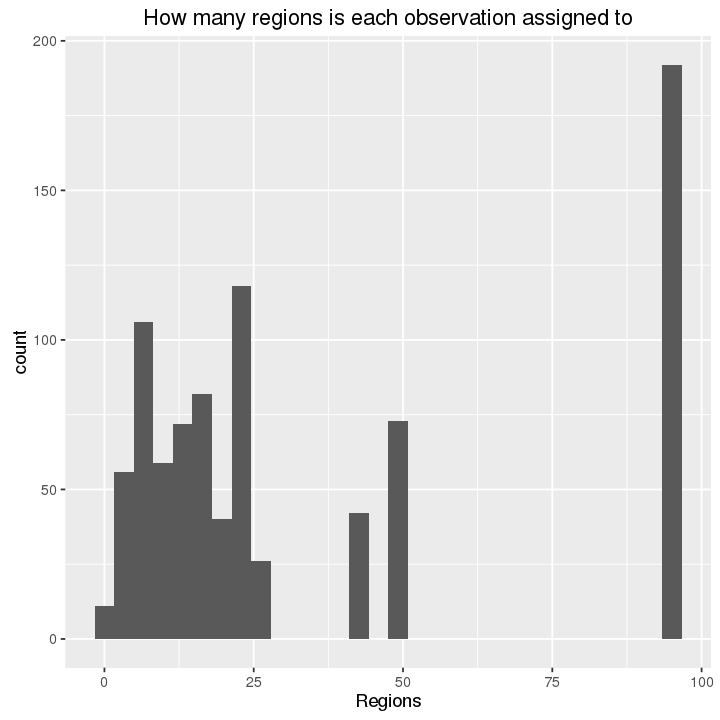

In [17]:
options(repr.plot.width=6, repr.plot.height=6)

ggplot(aes(x=n_per_study),data=data_50)+geom_histogram()+xlab('Regions')+ggtitle('How many regions is each observation assigned to')